In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import random
from functools import partial
import os 
import imageio 
from IPython.display import Image
from scipy import stats
from scipy.stats.qmc import LatinHypercube as lhs
import pandas as pd
import sympy

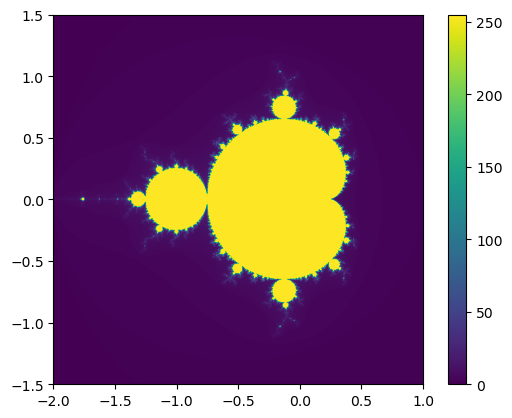

In [23]:
# Parameters 
width, height = 800, 800
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
max_iter = 256

# Create an empty canvas
canvas = np.zeros((width, height))

# Generate the Mandelbrot set
for x in range(width):
    for y in range(height):
        zx, zy = x * (xmax - xmin) / (width - 1) + xmin, y * (ymax - ymin) / (height - 1) + ymin
        c = zx + zy * 1j
        z = c
        for i in range(max_iter):
            if abs(z) > 2.0:
                break 
            z = z * z + c
        # Set the pixel value based on the number of iterations
        canvas[y, x] = i

# Create a colored image of the Mandelbrot set
plt.imshow(canvas, extent=(xmin, xmax, ymin, ymax))
plt.colorbar()
plt.show()

# Implement Zooming in Mandelbrot Set

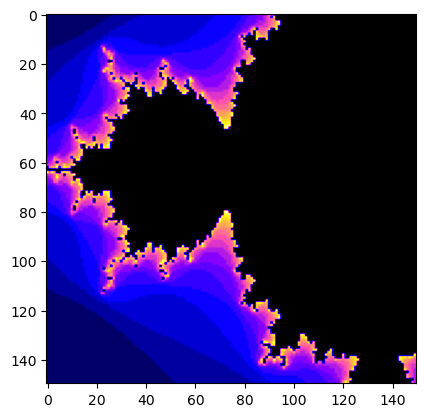

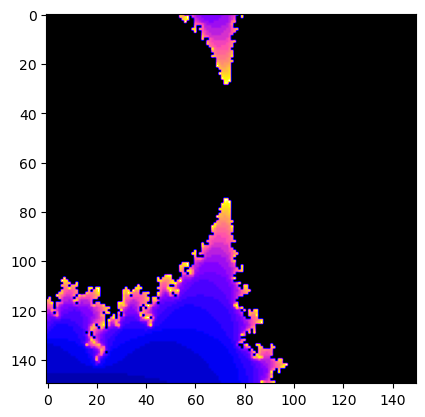

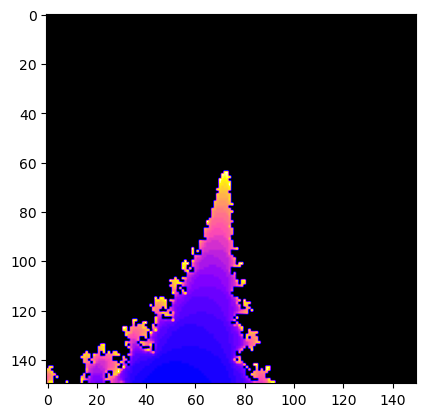

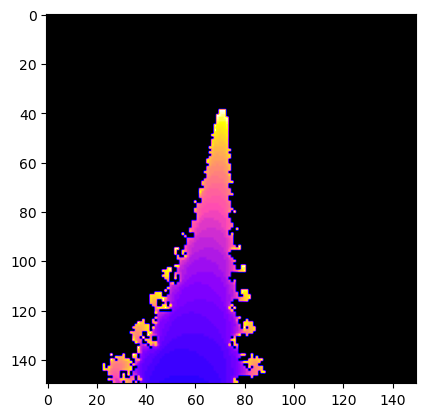

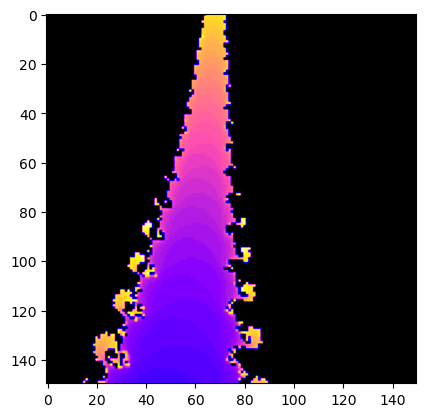

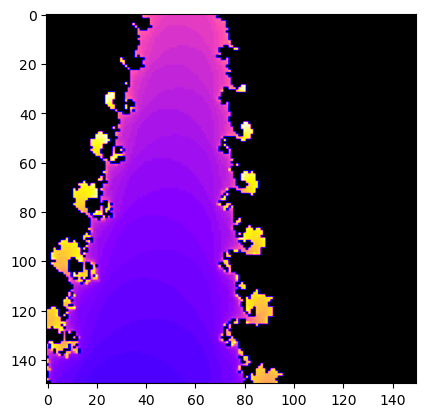

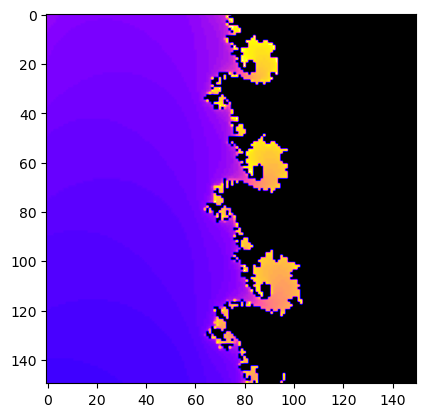

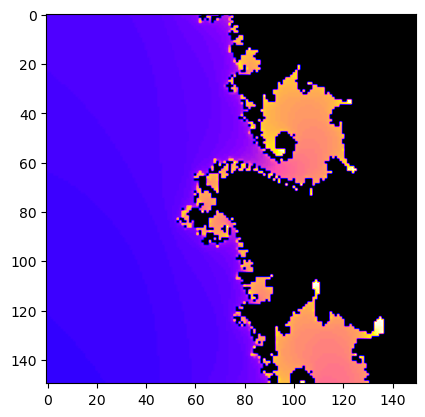

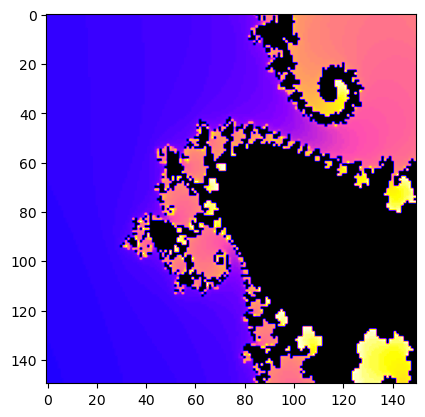

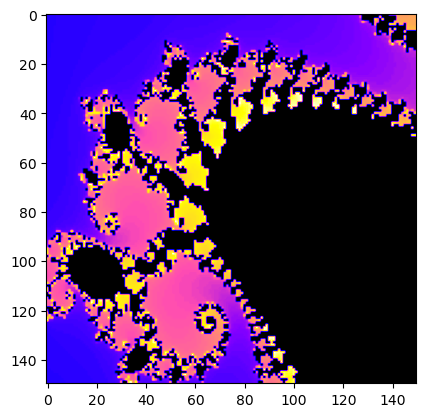

In [24]:
def func(z, c):
    """
    Function to calculate the next value 'z' in the iteration for the Mandelbrot set.

    Input:
    - z: Current complex number.
    - c: Complex number for the current pixel.

    Output:
    - Updated value 'z' using the formula z^2 + c.
    """

    return z**2 + c  # where c is the complex number

def diverge(c, max_iterations=50):
    """
    Function to determine whether a given complex number 'c' diverges within a maximum number of iterations.

    Input:
    - c: Complex number to be checked for divergence.
    - max_iterations: Maximum number of iterations (default is 50).

    Output:
    - Number of iterations until divergence or 0 if it doesn't diverge within the specified limit.
    """
    c = complex(*c)
    z = 0

    for i in range(max_iterations):
        z = z**2 + c

        # Set a boundary condition if it escapes
        # If the combination of the real part and imaginary part exceeds 4
        if z.real**2 + z.imag**2 >= 4:
            return i
    return 0

def construct_grid(bound_box, resolution=150):  # Define minimum and maximum of the system
    """
    Function to create a grid of coordinates within a specified bounding box.

    Input:
    - bound_box: Tuple (x_min, x_max, y_min, y_max) defining the boundary of the system.
    - resolution: Resolution for the grid (default is 150).

    Output:
    - 2D array of coordinates covering the specified bounding box.
    """

    x_min, x_max, y_min, y_max = bound_box
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    coords = np.c_[xx.ravel(), yy.ravel()]
    return coords

def construct_mandelbrot(coords, div, plot=True, filename=False):
    """
    Function to construct and plot the Mandelbrot set.

    Input:
    - coords: Array of complex coordinates.
    - div: Function to check divergence for each coordinate.
    - plot: Flag to display the Mandelbrot set (default is True).
    - filename: Optional filename to save the plot (default is False).

    Output:
    - 2D array representing the Mandelbrot set. If 'plot' is True, it also displays or saves the image.
    """

    mandel_brot = np.array([div(c) for c in coords])
    # Reshape to fit into a grid for plotting
    resolution = int(np.sqrt(coords.shape[0]))
    mandel_brot = mandel_brot.reshape(resolution, resolution)

    if plot:
        plt.imshow(mandel_brot, cmap='gnuplot2')        
        if filename:
            plt.savefig(f"figs/{filename}.png")
        plt.show()

    return mandel_brot

def zoom(bound_box, point, scale_factor=2):
    """
    Function to zoom in on a specific point within the Mandelbrot set.

    Input:
    - bound_box: Tuple (x_min, x_max, y_min, y_max) defining the current bounding box.
    - point: Center point for the zoom operation (x, y).
    - scale_factor: Factor to adjust the zoom (default is 2).

    Output:
    - Updated bounding box after the zoom operation.
    """
    x, y = point
    x_min, x_max, y_min, y_max = bound_box

    width = (x_max - x_min) / scale_factor  # Scale the zoom
    height = (y_max - y_min) / scale_factor

    return x - width/2, x + width/2, y - height/2, y + height/2

def padding(num, num_zeros= 3):
    l = len(str(num))
    return (num_zeros - l)* '0' + str(num)

p = -0.748, 0.1
zoom_factor = 2
bound_box = (-2.1, 1, -1.3, 1.3)
div = partial(diverge, max_iterations=20)
for i in range(10):
    # At each point, update the bound box and recompute the Mandelbrot set
    bound_box = zoom(bound_box, p, scale_factor=zoom_factor)
    coords = construct_grid(bound_box)
    div = partial(diverge, max_iterations = 20 + i*10)
    filename = f"mandel_brot_zoom_{padding(i*zoom_factor)}"
    construct_mandelbrot(coords, div, filename = filename)

In [25]:
# Specify the folder where your image files are located
folder_path = 'figs'  # Change this to the correct folder path

# List your image files in the specified folder
image_paths = [
    os.path.join(folder_path, 'mandel_brot_zoom_000.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_002.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_004.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_006.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_008.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_010.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_012.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_014.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_016.png'),
    os.path.join(folder_path, 'mandel_brot_zoom_018.png')
]

output_gif = 'mandelbrot_zoom.gif'

# Create the GIF from the image files
with imageio.get_writer(output_gif, mode='I') as writer:
    for image_path in image_paths:
        image = imageio.imread(image_path)
        writer.append_data(image)

# Display the created GIF
output_gif

/tmp/ipykernel_39833/4184218398.py:23: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


'mandelbrot_zoom.gif'

![Mandelbrot Zoom](mandelbrot_zoom.gif)

# Pure random sampling - single run

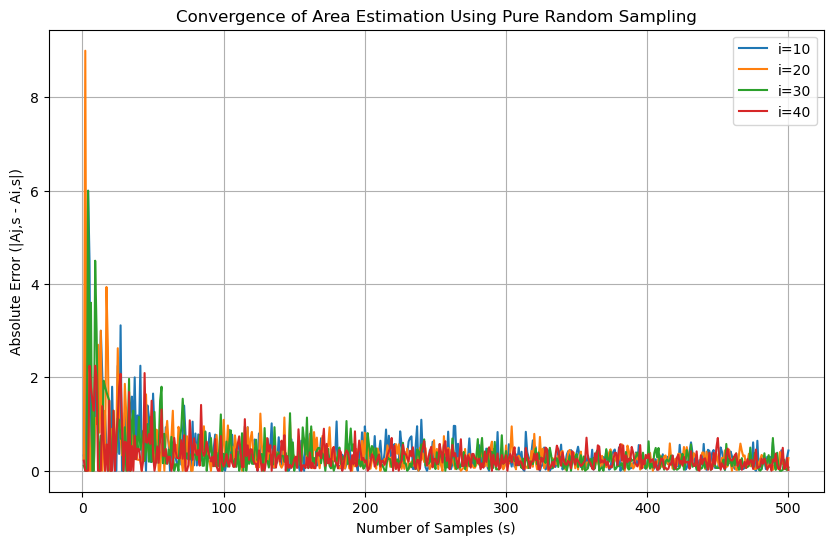

In [11]:
"""
This code performs Monte Carlo integration to estimate the area of the Mandelbrot set. It analyzes the convergence behavior of the estimation using pure random sampling.

Input:
- xmin, xmax, ymin, ymax: Bounding box defining the region for the Mandelbrot set.
- i_max: Maximum number of iterations for each sample.
- s_max: Maximum number of samples.
- Randomly generate complex numbers (x, y) within the bounding box for sampling.

Output:
- `area_estimations`: 2D array storing area estimations for each combination of iterations and samples.
- Convergence behavior analysis plot showing the absolute error for different numbers of iterations (i) and samples (s).

The code iterates through different numbers of iterations and samples, performing Monte Carlo integration to estimate the area of the Mandelbrot set. 
It then visualizes the convergence behavior.
"""

# Define the bounding box for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Initialize variables
i_max = 50  # Maximum number of iterations
s_max = 500  # Maximum number of samples

# Create arrays to store results
area_estimations = np.zeros((i_max, s_max))

# Convergence analysis loop
for i in range(1, i_max + 1):
    for s in range(1, s_max + 1):
        # Perform Monte Carlo integration to estimate AM using i iterations and s samples
        AM = 0.0

        for _ in range(s):
            x = random.uniform(xmin, xmax)
            y = random.uniform(ymin, ymax)
            c = complex(x, y)
            z = c

            for j in range(i):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                # Point is inside the Mandelbrot set
                AM += 1

        AM = (AM / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

        # Store the area estimation
        area_estimations[i - 1, s - 1] = AM

# Analyze and compare the convergence behavior
plt.figure(figsize=(10, 6))
for i in range(10, i_max, 10):
    errors = [np.abs(area_estimations[i - 2, s - 1] - area_estimations[i - 1, s - 1]) for s in range(s_max)]
    plt.plot(range(1, s_max + 1), errors, label=f'i={i}')
plt.xlabel('Number of Samples (s)')
plt.ylabel('Absolute Error (|Aj,s - Ai,s|)')
plt.legend()
plt.title('Convergence of Area Estimation Using Pure Random Sampling')
plt.grid(True)
plt.show()


# LHS - single run

- n is the number of samples to generate. Latin Hypercube Sampling aims to distribute these samples evenly across the defined range for each variable (x and y).

- The function sets a random seed using np.random.seed(random_state) to ensure reproducibility.

- It creates an equally spaced set of values between 0 and 1 for both x_samples and y_samples using np.linspace(0, 1, n, endpoint=False). This step ensures that you have n equally spaced intervals between 0 and 1.

- Next, it shuffles these equally spaced values using np.random.shuffle(x_samples) and np.random.shuffle(y_samples. Shuffling randomises the order of these values while preserving the uniform distribution.

- Finally, it scales these shuffled values to the specified range, which is defined by xmin, xmax, ymin, and ymax. This step maps the shuffled values back to the desired range for both the x and y coordinates.


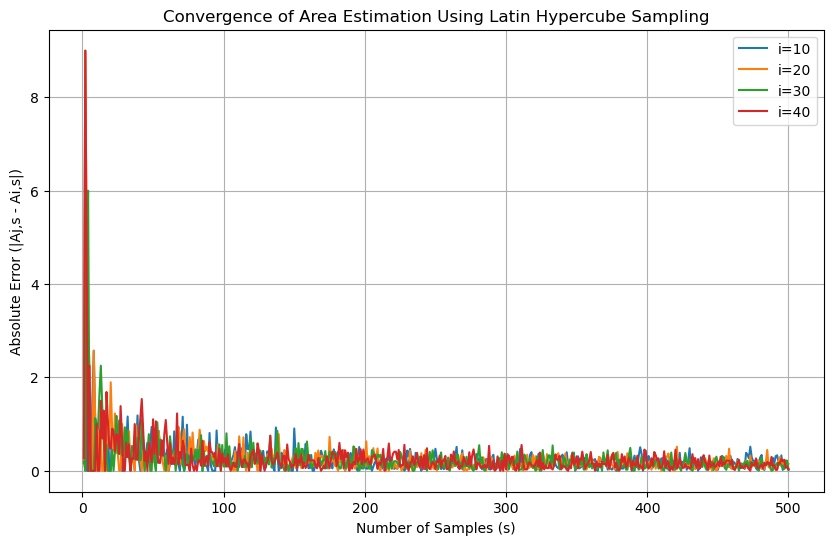

In [4]:
# Define the bounding box for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Initialize variables
i_max = 50  # Maximum number of iterations
s_max = 500  # Maximum number of samples

# Create arrays to store results
area_estimations = np.zeros((i_max, s_max))

# Define a Latin Hypercube Sampling function
def latin_hypercube_sampling(n, random_state=None, visualize = False, orthogonal_sampling = False):
    """
    Function to create n samples in a 2 dimensional space.
    Input:
    - n
    - visualization: True or False (False by default)
    - orthogonal sampling: True or False (False by default)
    (assumes variable ranges specified globally)

    Output:
    - x_samples
    - y_samples
    - Visualization of samples if parameter visualize = True
    """
    # Set the random seed for reproducibility
    # np.random.seed(random_state)

    # Use scipy package to generate latin hypercube samples
    if orthogonal_sampling == True:
        strength = 2
    else:
        strength = 1
    
    latin_hypercube = lhs(d=2, strength = strength)
    samples = latin_hypercube.random(n)

    # Scale the samples to the specified variable ranges
    x_samples = xmin + samples[:, 0] * (xmax - xmin)
    y_samples = ymin + samples[:, 1] * (ymax - ymin)

    #Shows drawn samples on a two dimensional grid
    if visualize:
        plt.scatter(x_samples, y_samples, s=10)
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Latin Hypercube Sampling Grid")
        grid_x = np.linspace(xmin, xmax, n+1)
        grid_y = np.linspace(ymin, ymax, n+1)
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.xticks(grid_x)
        plt.yticks(grid_y)
        plt.show()

    # Return the x and y samples
    return x_samples, y_samples


# Convergence analysis loop
for i in range(1, i_max + 1):
    for s in range(1, s_max + 1):
        # Perform Monte Carlo integration using Latin Hypercube Sampling
        AM = 0.0

        # Generate Latin Hypercube Samples
        x_samples, y_samples = latin_hypercube_sampling(s, random_state=i * s)

        for x, y in zip(x_samples, y_samples):
            c = complex(x, y)
            z = c

            for j in range(i):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                # Point is inside the Mandelbrot set
                AM += 1

        AM = (AM / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

        # Store the area estimation
        area_estimations[i - 1, s - 1] = AM

# Analyze and compare the convergence behavior
plt.figure(figsize=(10, 6))
for i in range(10, i_max, 10):
    errors = [np.abs(area_estimations[i - 2, s - 1] - area_estimations[i - 1, s - 1]) for s in range(s_max)]
    plt.plot(range(1, s_max + 1), errors, label=f'i={i}')
plt.xlabel('Number of Samples (s)')
plt.ylabel('Absolute Error (|Aj,s - Ai,s|)')
plt.legend()
plt.title('Convergence of Area Estimation Using Latin Hypercube Sampling')
plt.grid(True)
plt.show()

# Orthogonal sampling

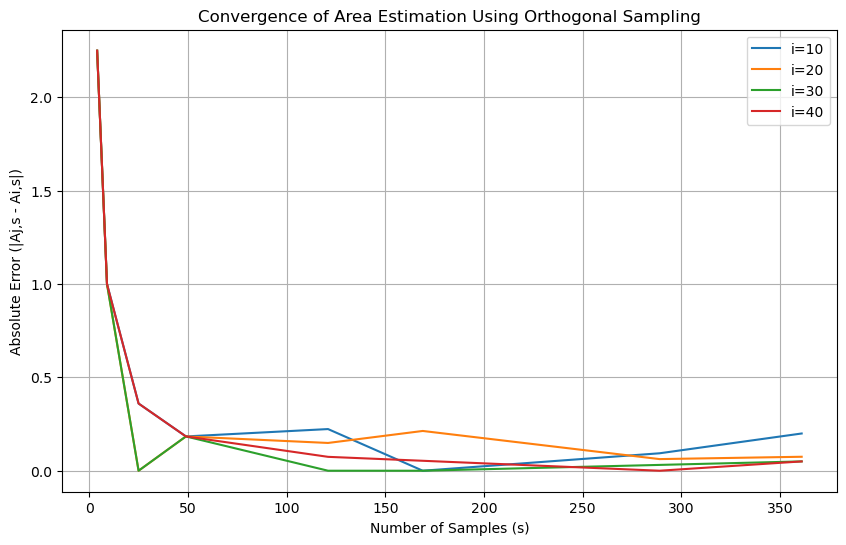

In [9]:
def get_prime_squares(max_value):
    """
    This function outputs prime square values between 1 to some specified maximum value.

    Input: upper bound of prime square value

    Output: list of prime squares from 1 to the upper bound (or up to closest prime square below the upper bound)
    """
    # Get a sufficient amount of prime numbers for testing
    primes = list(sympy.primerange(0.5*(max_value)))
    # Add a prime square if within bounds
    prime_squares = [p**2 for p in primes if p**2 < max_value]

    return prime_squares


# Define the bounding box for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Initialize variables
i_max = 50  # Maximum number of iterations
s_max = 500  # Maximum number of samples

# Filter sample sizes for orthogonal sampling: can only be squares of a prime
sample_sizes = get_prime_squares(s_max)

# Create arrays to store results
area_estimations = np.zeros((i_max, s_max))

# Convergence analysis loop
for i in range(1, i_max + 1):
    for s in sample_sizes:
        # Perform Monte Carlo integration using Latin Hypercube Sampling
        AM = 0.0

        # Generate samples with Orhtogonal Sampling method
        x_samples, y_samples = latin_hypercube_sampling(s, random_state=i * s, orthogonal_sampling=True)

        for x, y in zip(x_samples, y_samples):
            c = complex(x, y)
            z = c

            for j in range(i):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                # Point is inside the Mandelbrot set
                AM += 1

        AM = (AM / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

        # Store the area estimation
        area_estimations[i - 1, s - 1] = AM

# print(np.nonzero(area_estimations))

# Analyze and compare the convergence behaviors
plt.figure(figsize=(10, 6))
for i in range(10, i_max, 10):
    errors = [np.abs(area_estimations[i - 2, s - 1] - area_estimations[i - 1, s - 1]) for s in sample_sizes]
    plt.plot(sample_sizes, errors, label=f'i={i}')
plt.xlabel('Number of Samples (s)')
plt.ylabel('Absolute Error (|Aj,s - Ai,s|)')
plt.legend()
plt.title('Convergence of Area Estimation Using Orthogonal Sampling')
plt.grid(True)
plt.show()

# Pure Random Sampling vs LHS - single run

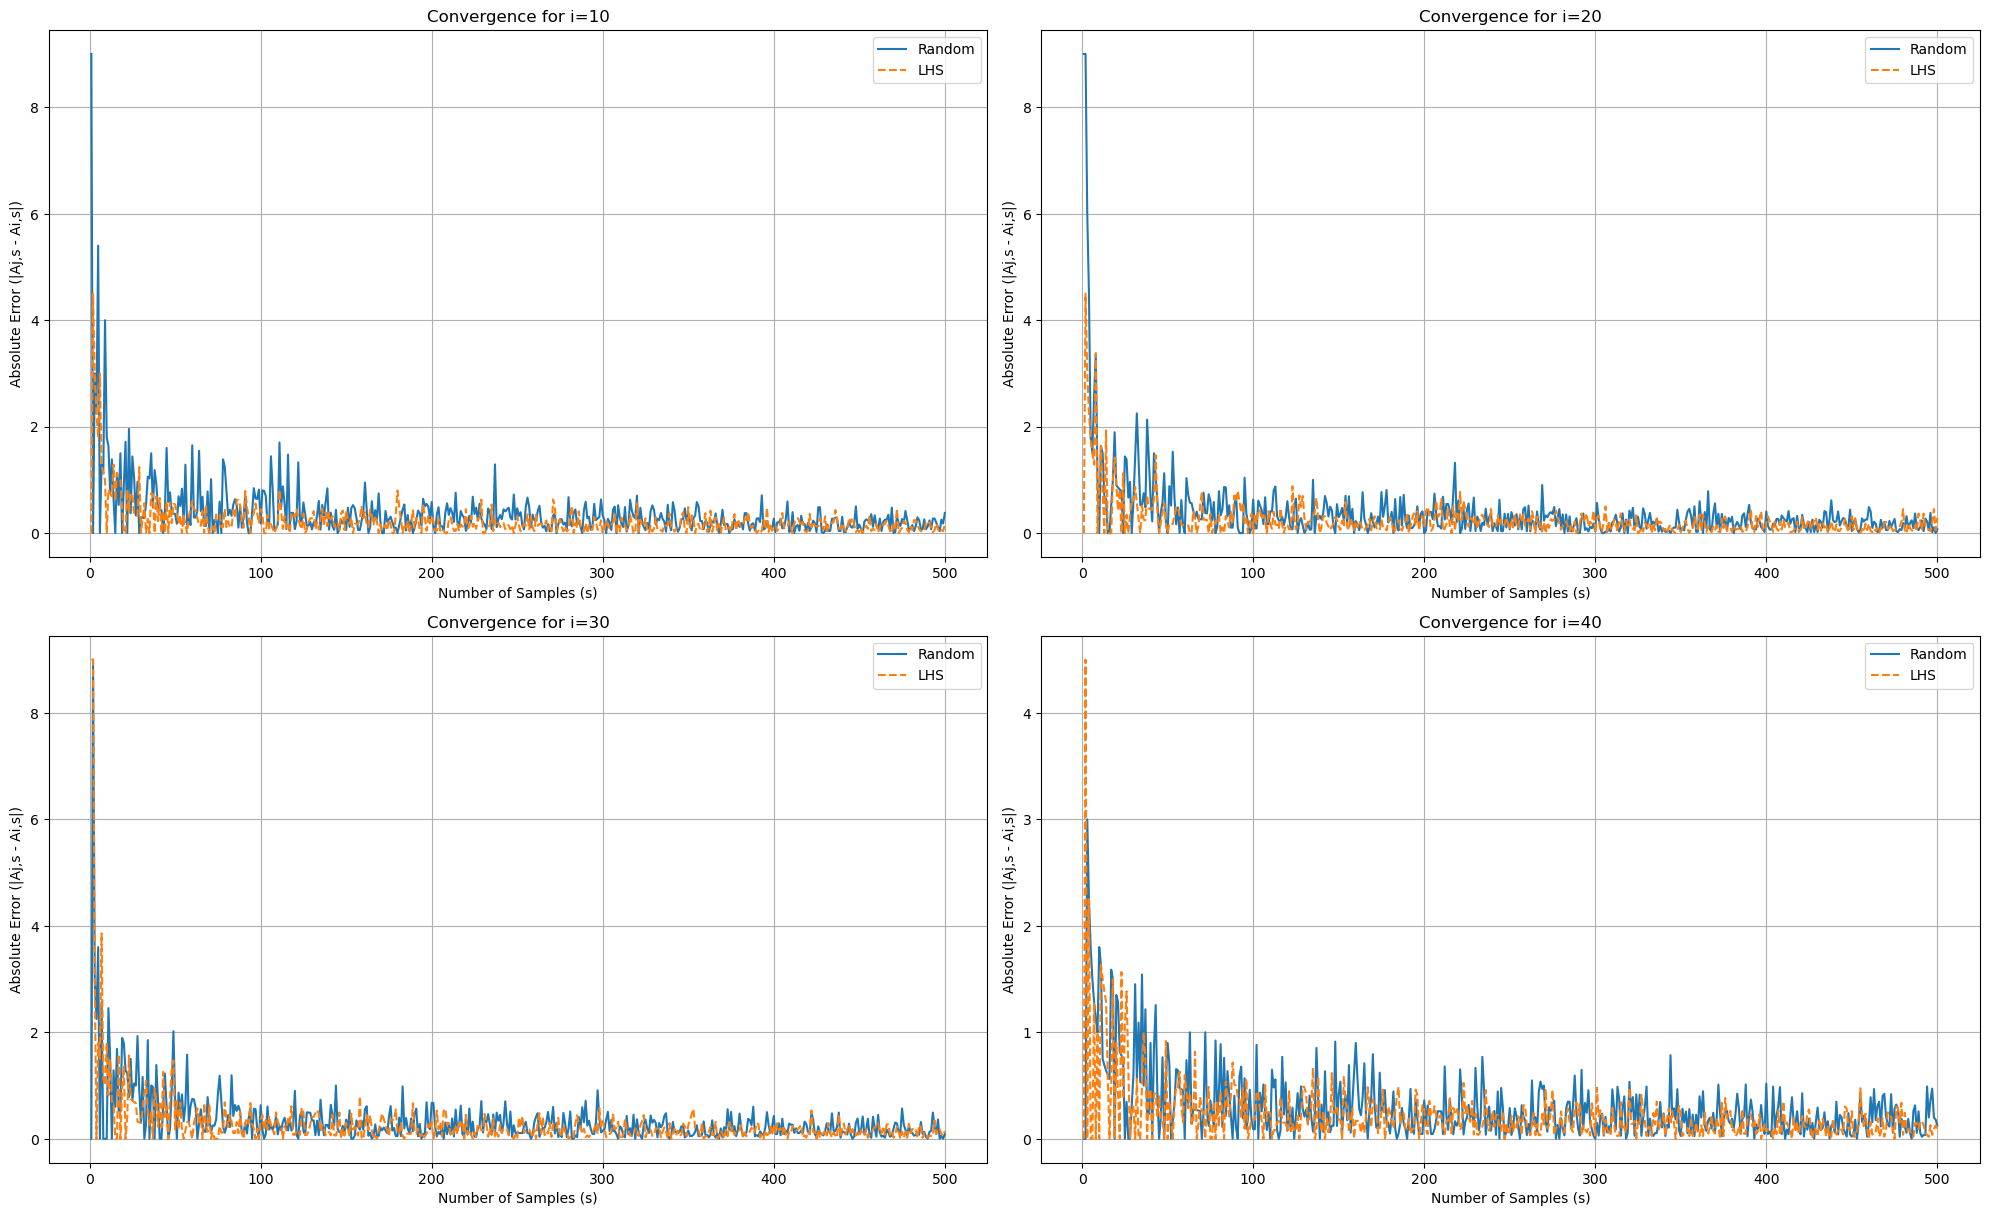

In [28]:
# Define the bounding box for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Initialize variables
i_max = 50  # Maximum number of iterations
s_max = 500  # Maximum number of samples

# Create arrays to store results for random sampling
area_estimations_random = np.zeros((i_max, s_max))

# Create arrays to store results for Latin Hypercube Sampling
area_estimations_lhs = np.zeros((i_max, s_max))

# Convergence analysis loop
for i in range(1, i_max + 1):
    for s in range(1, s_max + 1):
        # Perform Monte Carlo integration using random sampling
        AM_random = 0.0

        for _ in range(s):
            x = random.uniform(xmin, xmax)
            y = random.uniform(ymin, ymax)
            c = complex(x, y)
            z = c

            for j in range(i):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                # Point is inside the Mandelbrot set
                AM_random += 1

        AM_random = (AM_random / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

        # Store the area estimation for random sampling
        area_estimations_random[i - 1, s - 1] = AM_random

        # Perform Monte Carlo integration using Latin Hypercube Sampling
        AM_lhs = 0.0

        # Generate Latin Hypercube Samples
        x_samples, y_samples = latin_hypercube_sampling(s)

        for x, y in zip(x_samples, y_samples):
            c = complex(x, y)
            z = c

            for j in range(i):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                # Point is inside the Mandelbrot set
                AM_lhs += 1

        AM_lhs = (AM_lhs / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

        # Store the area estimation for Latin Hypercube Sampling
        area_estimations_lhs[i - 1, s - 1] = AM_lhs

# Create subplots for each value of i
plt.figure(figsize=(20, 30))

for i in range(10, i_max, 10):
    plt.subplot(5, 2, i // 10)
    
    # Plot convergence behavior for random sampling
    errors_random = [np.abs(area_estimations_random[i, s] - area_estimations_random[i - 1, s]) for s in range(s_max)]
    plt.plot(range(1, s_max + 1), errors_random, label=f'Random', linestyle='-')

    # Plot convergence behavior for Latin Hypercube Sampling
    errors_lhs = [np.abs(area_estimations_lhs[i, s] - area_estimations_lhs[i - 1, s]) for s in range(s_max)]
    plt.plot(range(1, s_max + 1), errors_lhs, label=f'LHS', linestyle='--')
    
    plt.xlabel('Number of Samples (s)')
    plt.ylabel('Absolute Error (|Aj,s - Ai,s|)')
    plt.title(f'Convergence for i={i}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

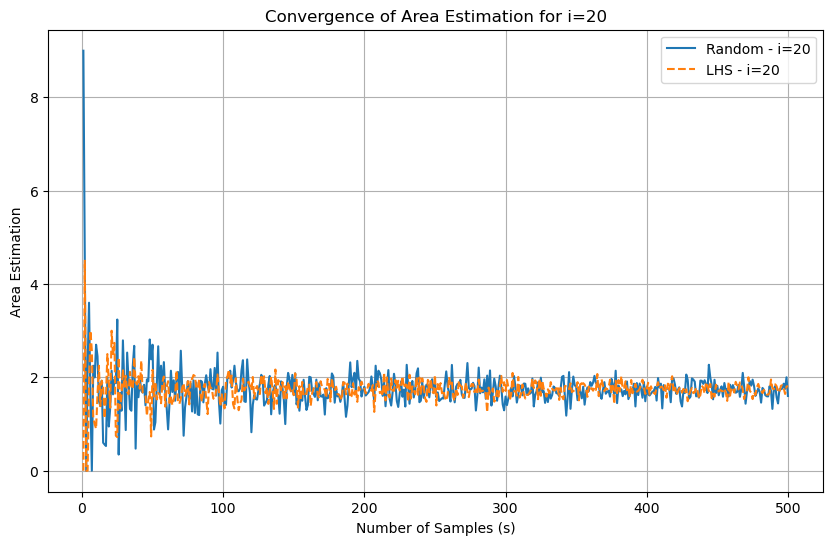

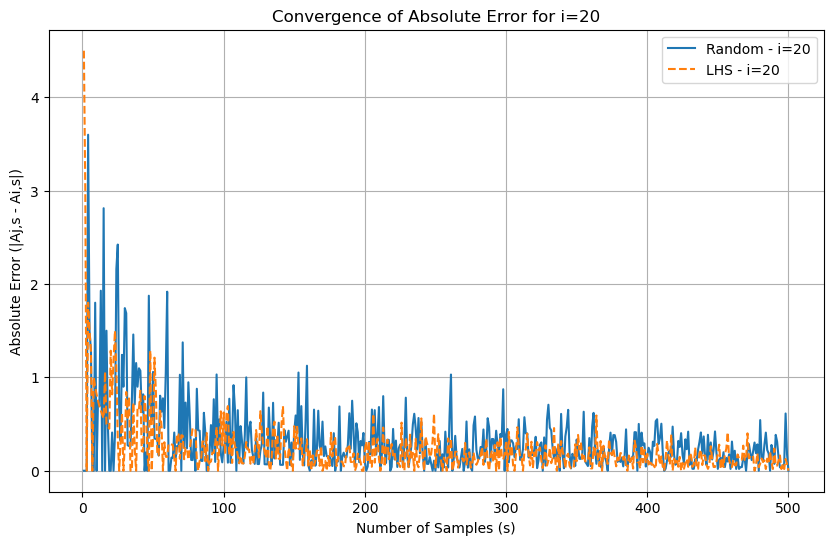

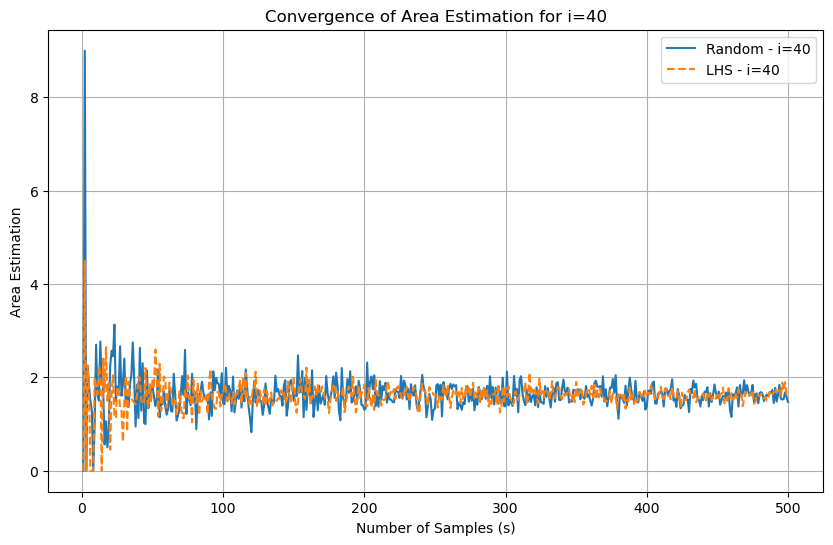

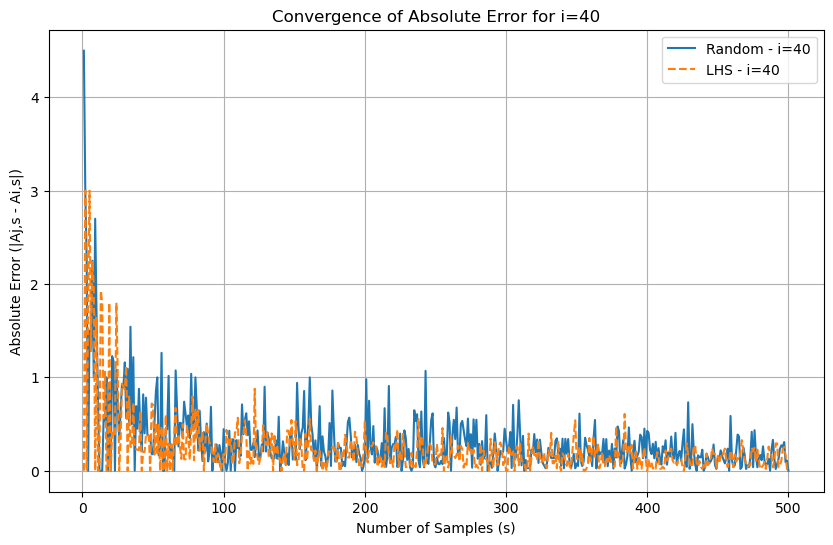

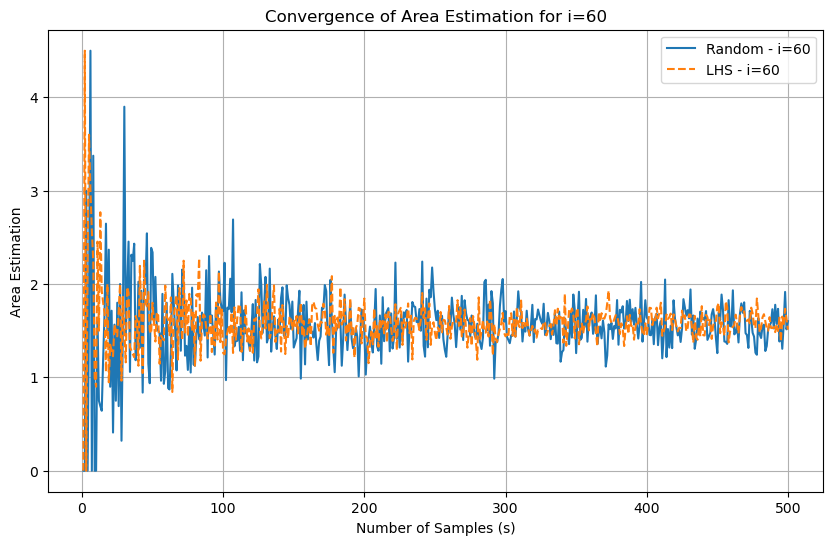

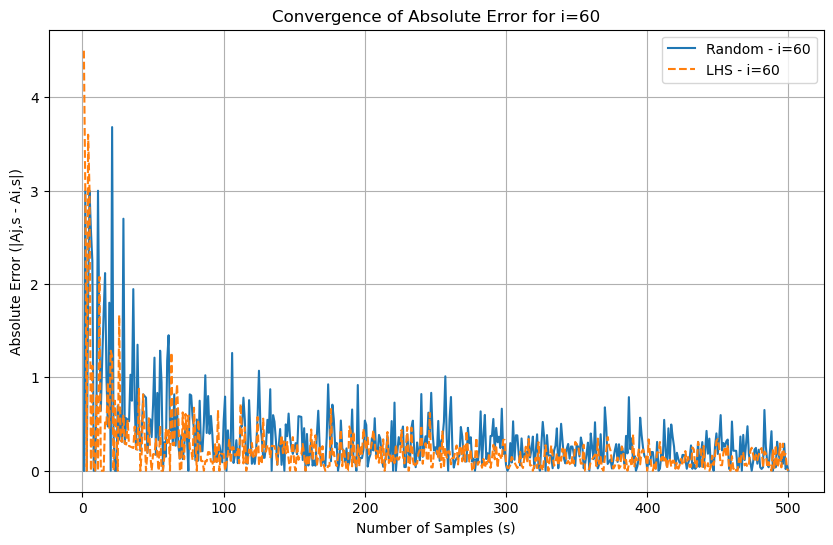

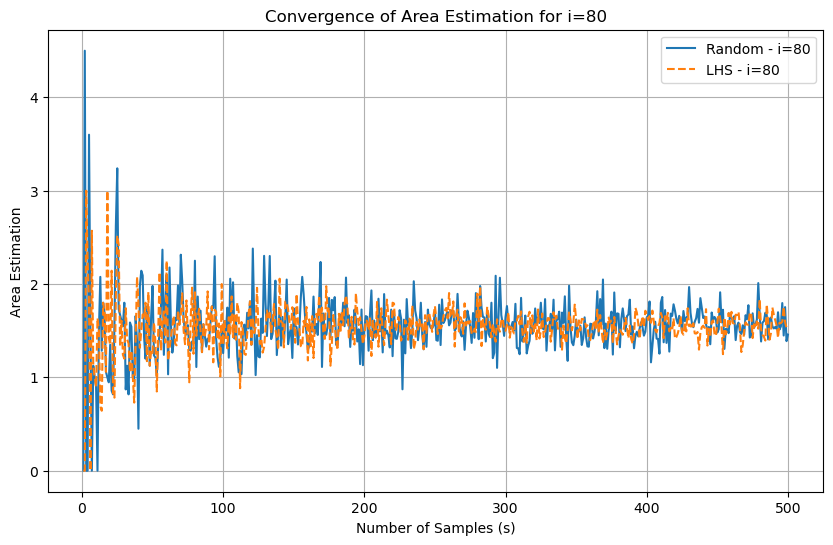

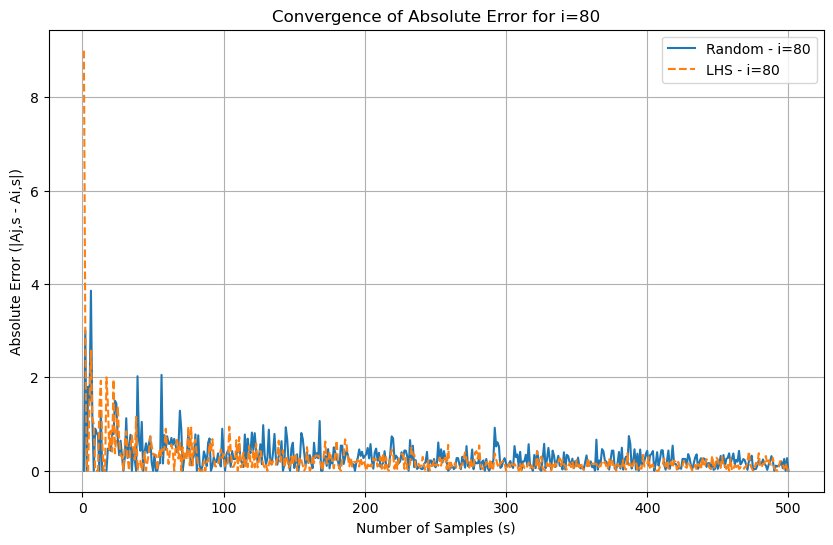

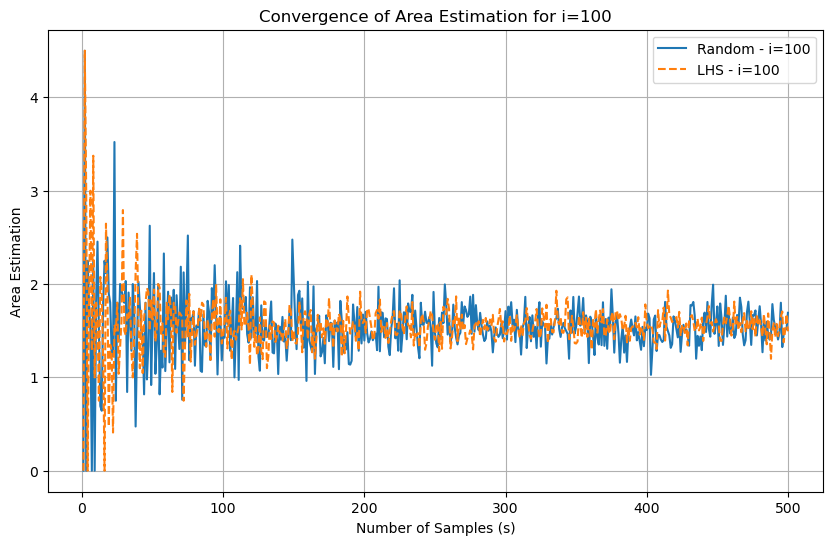

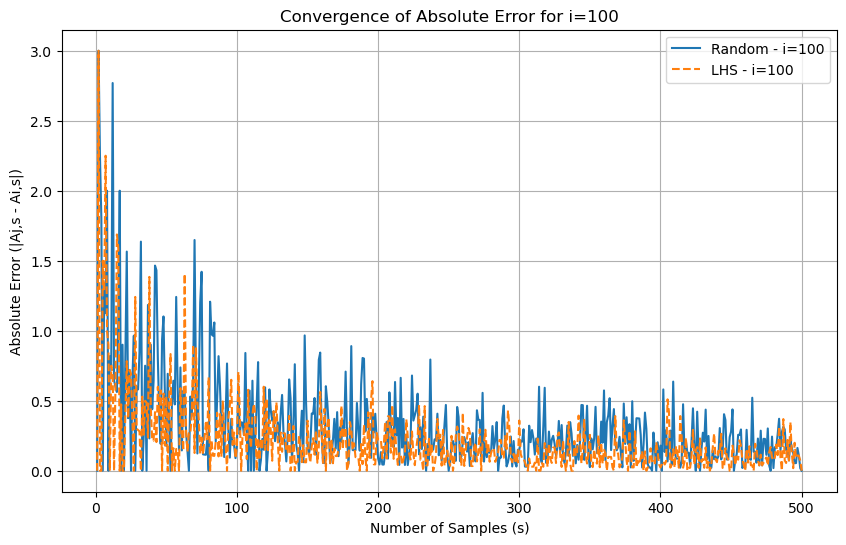

In [29]:
# Define the bounding box for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Initialize variables
i_max = 110  # Maximum number of iterations
s_max = 500  # Maximum number of samples

# Create arrays to store results
area_estimations_random = np.zeros((i_max, s_max))
area_estimations_lhs = np.zeros((i_max, s_max))

# Create arrays to store results for the absolute error
absolute_errors_random = np.zeros((i_max, s_max))
absolute_errors_lhs = np.zeros((i_max, s_max))

# Convergence analysis loop
for i in range(1, i_max + 1):
    for s in range(1, s_max + 1):
        # Perform Monte Carlo integration using random sampling
        AM_random = 0.0

        for _ in range(s):
            x = random.uniform(xmin, xmax)
            y = random.uniform(ymin, ymax)
            c = complex(x, y)
            z = c

            for j in range(i):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                # Point is inside the Mandelbrot set
                AM_random += 1

        AM_random = (AM_random / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

        # Store the area estimation for random sampling
        area_estimations_random[i - 1, s - 1] = AM_random

        # Perform Monte Carlo integration using Latin Hypercube Sampling
        AM_lhs = 0.0

        # Generate Latin Hypercube Samples
        x_samples, y_samples = latin_hypercube_sampling(s)

        for x, y in zip(x_samples, y_samples):
            c = complex(x, y)
            z = c

            for j in range(i):
                if abs(z) > 2.0:
                    break
                z = z * z + c
            else:
                # Point is inside the Mandelbrot set
                AM_lhs += 1

        AM_lhs = (AM_lhs / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

        # Store the area estimation for Latin Hypercube Sampling
        area_estimations_lhs[i - 1, s - 1] = AM_lhs

# Calculate absolute errors for random sampling
for i in range(1, i_max):
    for s in range(1, s_max):
        absolute_errors_random[i - 1, s - 1] = np.abs(area_estimations_random[i, s] - area_estimations_random[i - 1, s])

# Calculate absolute errors for Latin Hypercube Sampling
for i in range(1, i_max):
    for s in range(1, s_max):
        absolute_errors_lhs[i - 1, s - 1] = np.abs(area_estimations_lhs[i, s] - area_estimations_lhs[i - 1, s])

# Create individual plots for each i value
for i in [20, 40, 60, 80, 100]:
    plt.figure(figsize=(10, 6))
    
    # Plot area estimation for random sampling and Latin Hypercube Sampling
    plt.plot(range(1, s_max + 1), area_estimations_random[i - 1], label=f'Random - i={i}', linestyle='-')
    plt.plot(range(1, s_max + 1), area_estimations_lhs[i - 1], label=f'LHS - i={i}', linestyle='--')
    
    plt.xlabel('Number of Samples (s)')
    plt.ylabel('Area Estimation')
    plt.legend()
    plt.title(f'Convergence of Area Estimation for i={i}')
    plt.grid(True)
    
    plt.show()
    
    plt.figure(figsize=(10, 6))
    
    # Plot absolute error for random sampling and Latin Hypercube Sampling
    plt.plot(range(1, s_max + 1), absolute_errors_random[i - 1], label=f'Random - i={i}', linestyle='-')
    plt.plot(range(1, s_max + 1), absolute_errors_lhs[i - 1], label=f'LHS - i={i}', linestyle='--')
    
    plt.xlabel('Number of Samples (s)')
    plt.ylabel('Absolute Error (|Aj,s - Ai,s|)')
    plt.legend()
    plt.title(f'Convergence of Absolute Error for i={i}')
    plt.grid(True)
    
    plt.show()


In [30]:
# Save area estimations for random sampling
area_estimations_random_df = pd.DataFrame(area_estimations_random.T, columns=[f'i={i}' for i in range(1, i_max + 1)], index=range(1, s_max + 1))
area_estimations_random_df.to_csv('area_estimations_random.csv')

# Save area estimations for Latin Hypercube Sampling
area_estimations_lhs_df = pd.DataFrame(area_estimations_lhs.T, columns=[f'i={i}' for i in range(1, i_max + 1)], index=range(1, s_max + 1))
area_estimations_lhs_df.to_csv('area_estimations_lhs.csv')

# Save absolute errors for random sampling
absolute_errors_random_df = pd.DataFrame(absolute_errors_random.T, columns=[f'i={i}' for i in range(1, i_max + 1)], index=range(1, s_max +1 ))
absolute_errors_random_df.to_csv('absolute_errors_random.csv')

# Save absolute errors for Latin Hypercube Sampling
absolute_errors_lhs_df = pd.DataFrame(absolute_errors_lhs.T, columns=[f'i={i}' for i in range(1, i_max + 1)], index=range(1, s_max + 1))
absolute_errors_lhs_df.to_csv('absolute_errors_lhs.csv')

# Averaged over 10 runs

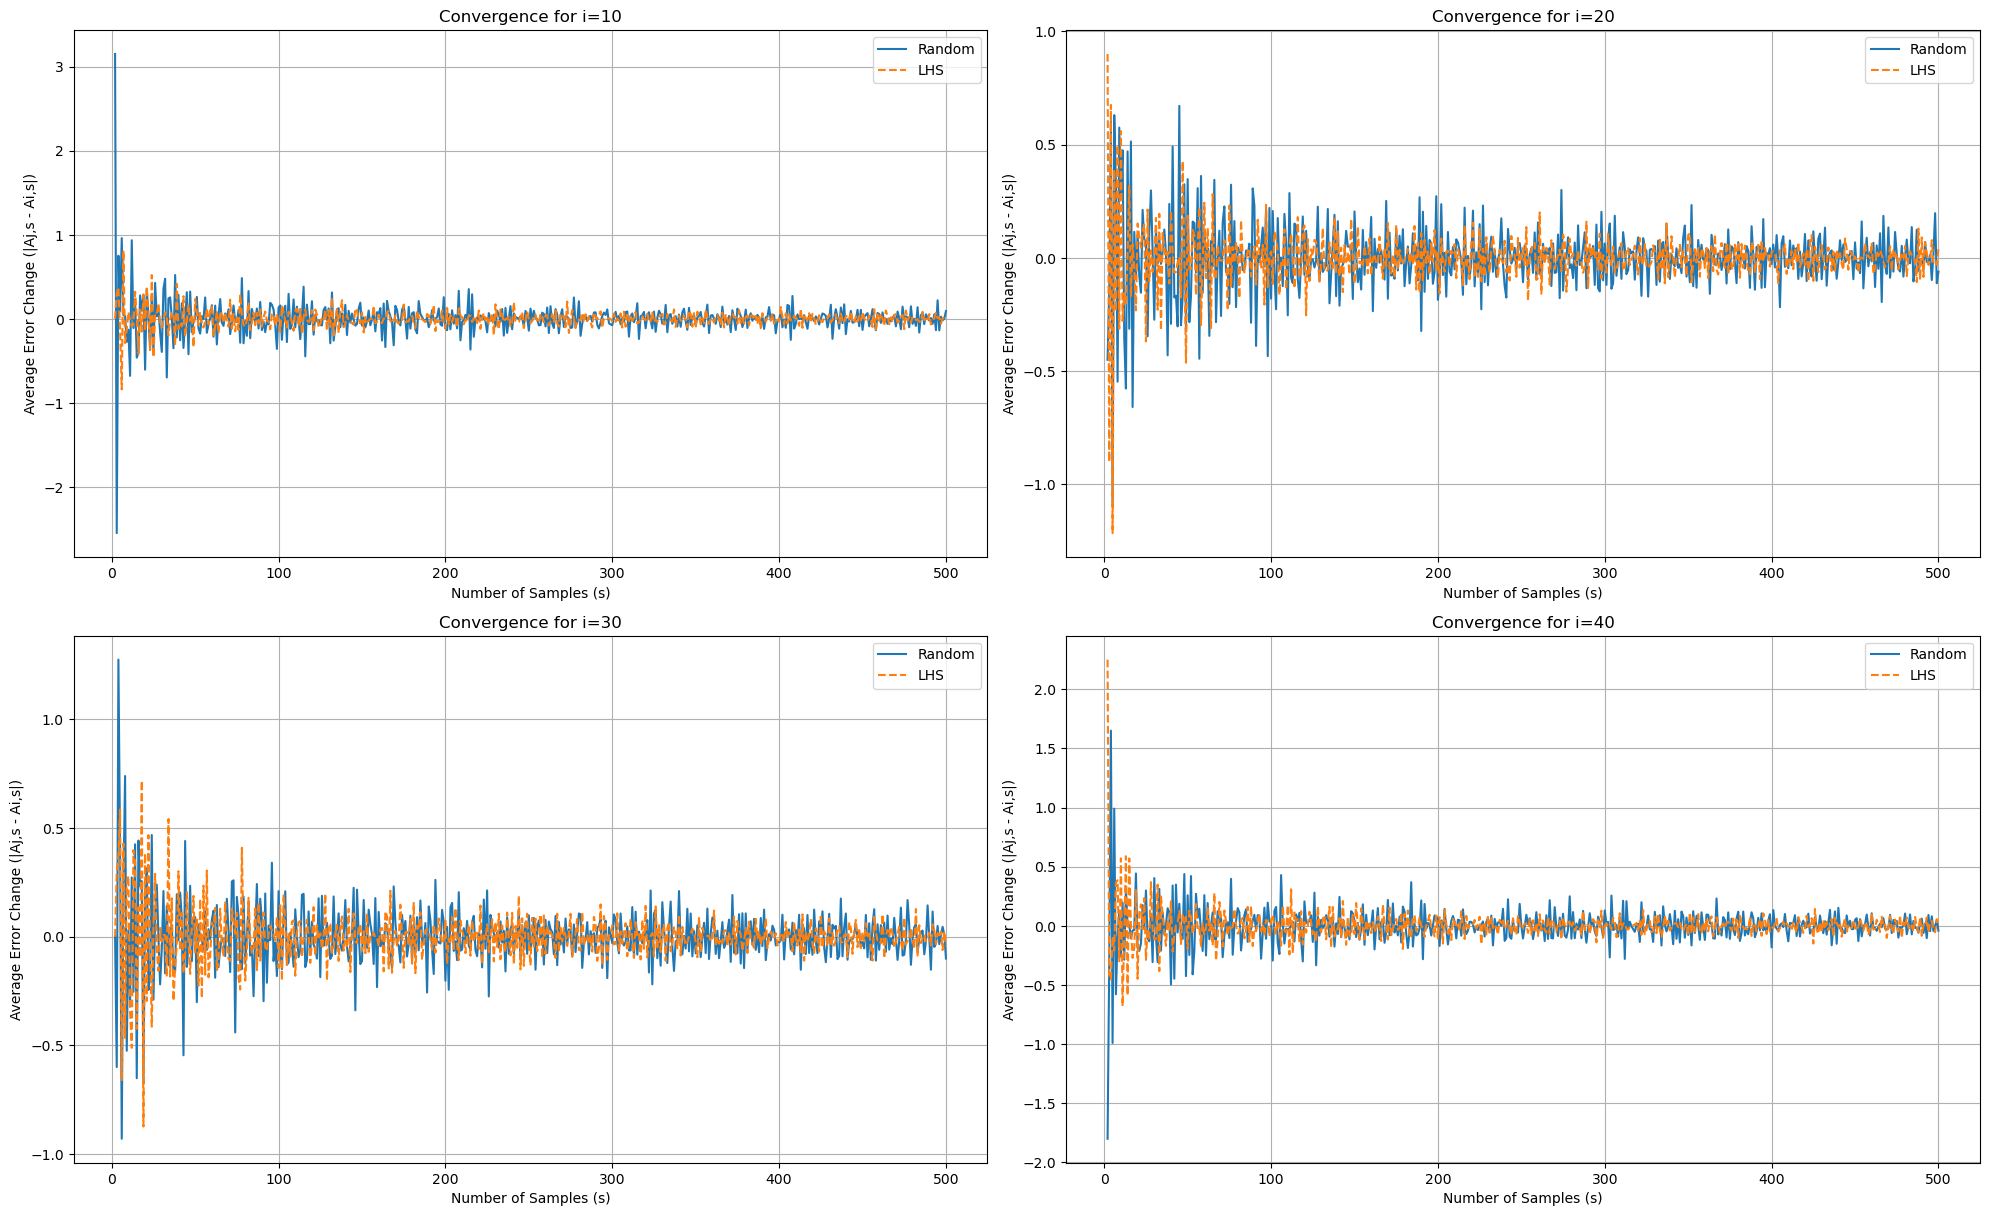

In [31]:
# Define the bounding box for the Mandelbrot set
xmin, xmax, ymin, ymax = -2.0, 1.0, -1.5, 1.5

# Initialize variables
i_max = 50  # Maximum number of iterations
s_max = 500  # Maximum number of samples
num_simulations = 10  # Number of simulations

# Create arrays to store results for random sampling
area_estimations_random = np.zeros((num_simulations, i_max, s_max))

# Create arrays to store results for Latin Hypercube Sampling
area_estimations_lhs = np.zeros((num_simulations, i_max, s_max))

# Convergence analysis loop for multiple simulations
for sim in range(num_simulations):
    for i in range(1, i_max + 1):
        for s in range(1, s_max + 1):
            # Perform Monte Carlo integration using random sampling
            AM_random = 0.0

            for _ in range(s):
                x = random.uniform(xmin, xmax)
                y = random.uniform(ymin, ymax)
                c = complex(x, y)
                z = c

                for j in range(i):
                    if abs(z) > 2.0:
                        break
                    z = z * z + c
                else:
                    # Point is inside the Mandelbrot set
                    AM_random += 1

            AM_random = (AM_random / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

            # Store the area estimation for random sampling
            area_estimations_random[sim, i - 1, s - 1] = AM_random

            # Perform Monte Carlo integration using Latin Hypercube Sampling
            AM_lhs = 0.0

            # Generate Latin Hypercube Samples
            x_samples, y_samples = latin_hypercube_sampling(s)

            for x, y in zip(x_samples, y_samples):
                c = complex(x, y)
                z = c

                for j in range(i):
                    if abs(z) > 2.0:
                        break
                    z = z * z + c
                else:
                    # Point is inside the Mandelbrot set
                    AM_lhs += 1

            AM_lhs = (AM_lhs / s) * (xmax - xmin) * (ymax - ymin)  # Scale to the full area

            # Store the area estimation for Latin Hypercube Sampling
            area_estimations_lhs[sim, i - 1, s - 1] = AM_lhs

# Calculate the average results over simulations
average_changes_random = np.mean(np.diff(area_estimations_random, axis=2), axis=0)
average_changes_lhs = np.mean(np.diff(area_estimations_lhs, axis=2), axis=0)

# Create subplots for each value of i
plt.figure(figsize=(20, 30))

for i in range(10, i_max, 10):
    plt.subplot(5, 2, i // 10)
    
    # Plot convergence behavior for random sampling
    plt.plot(range(2, s_max + 1), average_changes_random[i - 1], label=f'Random', linestyle='-')

    # Plot convergence behavior for Latin Hypercube Sampling
    plt.plot(range(2, s_max + 1), average_changes_lhs[i - 1], label=f'LHS', linestyle='--')
    
    plt.xlabel('Number of Samples (s)')
    plt.ylabel('Average Error Change (|Aj,s - Ai,s|)')
    plt.title(f'Convergence for i={i}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()